In [40]:
import numpy as np
import matplotlib.pyplot as plt

from pydmps.dmp_discrete import DMPs_discrete
from pydmps.dmp_rhythmic import DMPs_rhythmic

try:
    import re
    with open('data.txt', 'r') as f:
        text = f.read()
        text = text.replace('[', '').replace(']', '').replace('\n', '')
        trajectory_data = np.fromstring(text, sep=' ').reshape(-1, 7)
except:
    print("Trajectory not found")
    trajectory_data = np.zeros((400, 7))

T, D = trajectory_data.shape
n_dims = D
n_bfs = 250
dt = 1.0 / T
trajectory_data_t = trajectory_data.T  # shape: (D, T)

In [41]:
d_dmp = DMPs_discrete(n_dmps=D, n_bfs=n_bfs, dt=dt)
d_dmp.imitate_path(y_des=trajectory_data_t)

generated_trajectory, _, _ = d_dmp.rollout(timesteps=T) 

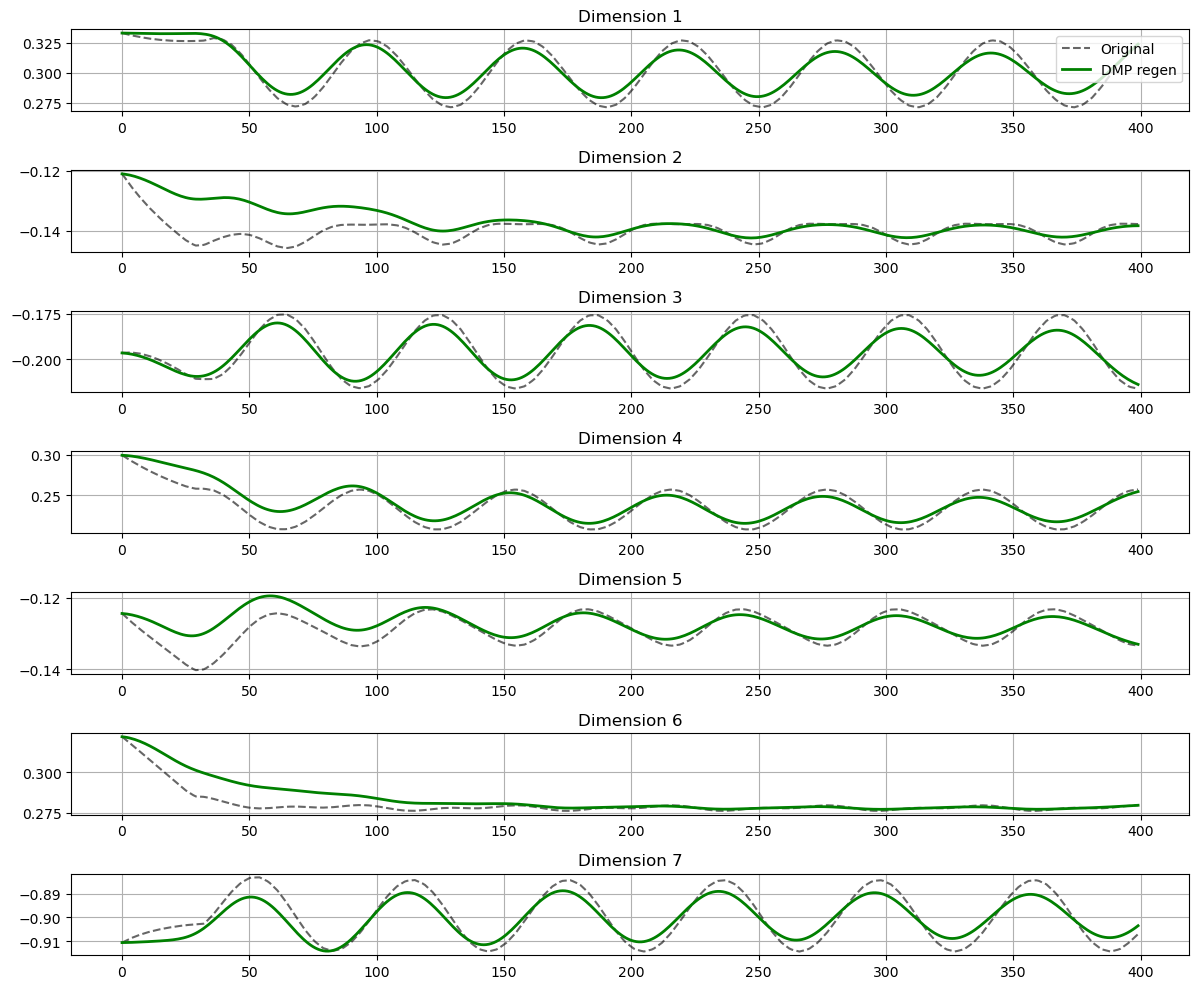

In [42]:
plt.figure(figsize=(12, 10))
for dim in range(7):
    plt.subplot(7, 1, dim+1)
    plt.plot(trajectory_data[:, dim], 'k--', alpha=0.6, label='Original')
    plt.plot(generated_trajectory[:, dim], 'g', linewidth=2, label='DMP regen')
    plt.title(f'Dimension {dim+1}')
    plt.grid(True)
    if dim == 0:
        plt.legend(loc='upper right')
plt.tight_layout()
plt.show()